In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
sales = pd.read_csv(r"C:\Users\hp\Desktop\sales_analytics_project\sales.csv") 
customer = pd.read_csv(r"C:\Users\hp\Desktop\sales_analytics_project\customers.csv") 
orders = pd.read_csv(r"C:\Users\hp\Desktop\sales_analytics_project\orders.csv") 
sales.head()
customer.head()
orders.head()

,order_id,customer_id,order_date,employee_id
0,1,22480,2020-10-20,20641
1,2,24416,2024-07-14,5190
2,3,1546,2024-09-06,9217
3,4,11838,2021-10-19,24422
4,5,4832,2023-08-16,6243


In [5]:
print("📄 Sales columns:", sales.columns)
print("📄 Customers columns:", customer.columns)
print("📄 Orders columns:", orders.columns)

📄 Sales columns: Index(['sale_id', 'order_id', 'product_id', 'quantity', 'sale_price',
       'total_price'],
      dtype='object')
📄 Customers columns: Index(['customer_id', 'customer_name', 'email', 'phone', 'city', 'country',
       'created_at'],
      dtype='object')
📄 Orders columns: Index(['order_id', 'customer_id', 'order_date', 'employee_id'], dtype='object')


In [6]:
merged1 = sales.merge(orders[['order_id', 'customer_id']], on='order_id', how='left')

In [7]:
final_df = merged1.merge(customer[['customer_id', 'country']], on='customer_id', how='left')

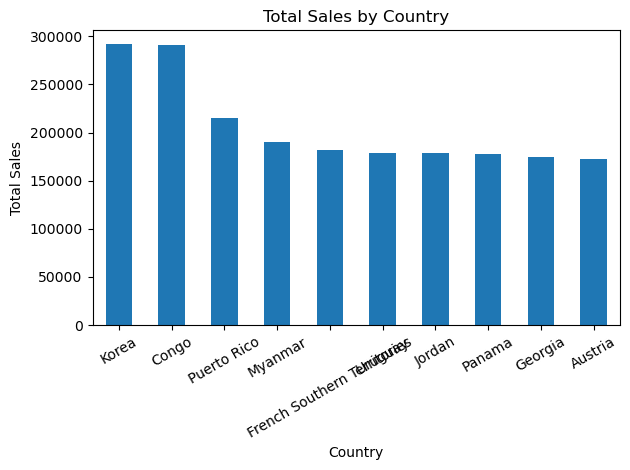

In [8]:
final_df.groupby('country')['total_price'].sum() \
    .sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()



In [ ]:
# Top 10 Products by Sales 

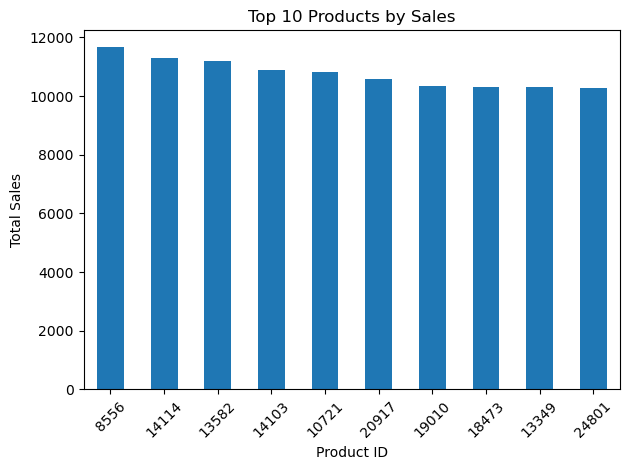

In [9]:
final_df.groupby('product_id')['total_price'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# Analyze monthly sales performance over time. How do sales trends vary month by month, and what insights can be drawn from it

Text(0, 0.5, 'Total Sales')

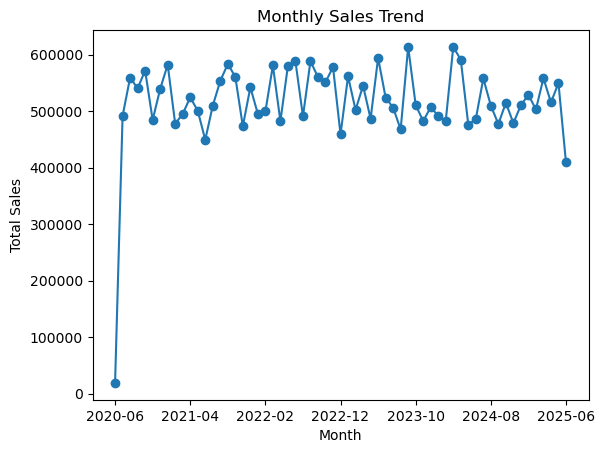

In [11]:
orders['order_date'] = pd.to_datetime(orders['order_date'])
merged1 = sales.merge(orders[['order_id', 'customer_id', 'order_date']], on='order_id', how='left')
merged1['month'] = merged1['order_date'].dt.to_period('M').astype(str)

monthly_sales = merged1.groupby('month')['total_price'].sum()

monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')

In [12]:
# Top 10 Cities by Total Sales

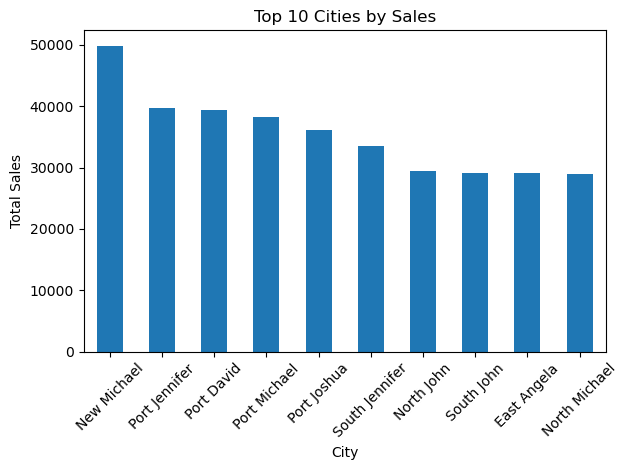

In [13]:
merged2 = merged1.merge(customer[['customer_id', 'city']], on='customer_id', how='left')
merged2.groupby('city')['total_price'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Cities by Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# Analyze how total sales have changed month-over-month. Create a time-series line chart showing the monthly trend in revenue.”

C:\Users\hp\AppData\Local\Temp\ipykernel_3872\3015547520.py:18: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\hp\Untitled Folder\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


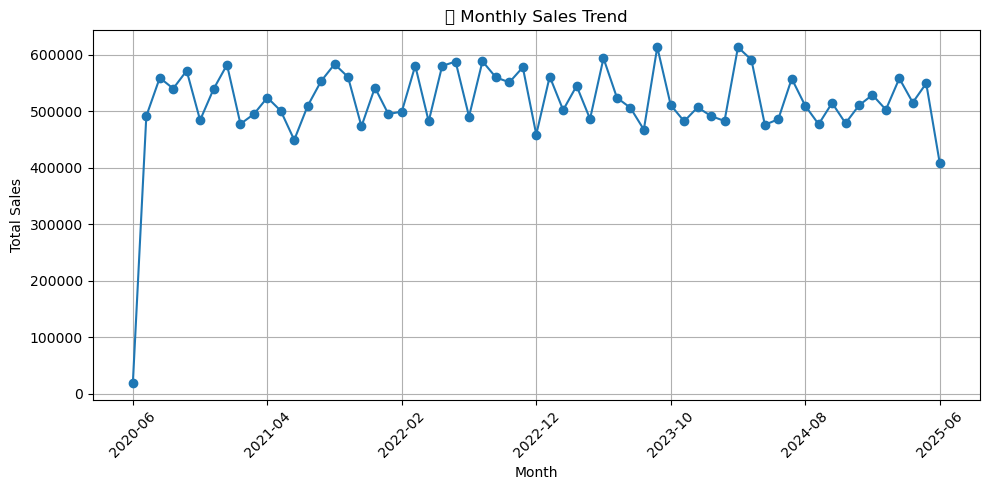

In [15]:

orders['order_date'] = pd.to_datetime(orders['order_date'])

# Step 3: Merge sales with orders
merged = sales.merge(orders[['order_id', 'order_date']], on='order_id', how='left')

# Step 4: Extract month
merged['month'] = merged['order_date'].dt.to_period('M').astype(str)

# Step
monthly_sales = merged.groupby('month')['total_price'].sum()

monthly_sales.plot(kind='line', marker='o', figsize=(10, 5))
plt.title('📅 Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [1]:
# Which employees are generating the highest total sales? Visualize employee-wise sales performance to compare their contribution.

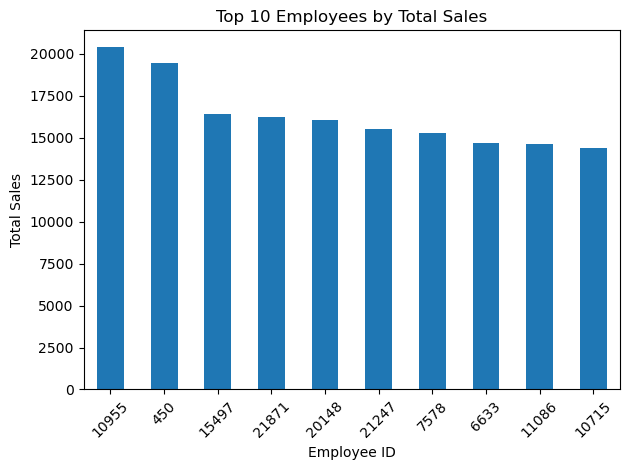

In [11]:
merged = sales.merge(orders[['order_id', 'employee_id']], on='order_id', how='left')
top_employees = merged.groupby('employee_id')['total_price'].sum().sort_values(ascending=False).head(10)

top_employees.plot(kind='bar')
plt.title('Top 10 Employees by Total Sales')
plt.xlabel('Employee ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

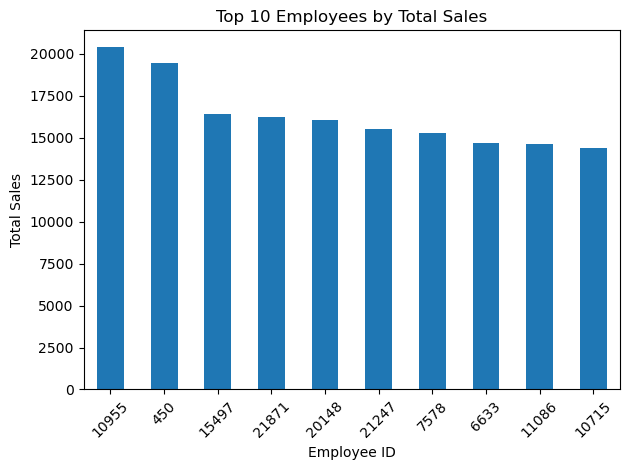

In [12]:
top_employees = merged.groupby('employee_id')['total_price'].sum().sort_values(ascending=False).head(10)

top_employees.plot(kind='bar')
plt.title('Top 10 Employees by Total Sales')
plt.xlabel('Employee ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()